<a href="https://colab.research.google.com/github/Samirdanish55/FitClub-Starter/blob/master/Interactive_Sales_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# =========================
# COMMON SETUP
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from matplotlib.backends.backend_pdf import PdfPages

# Load data
df = pd.read_csv("/content/sales_data.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Seaborn style
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (8, 5)

df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


Day 1: Seaborn **Basics**

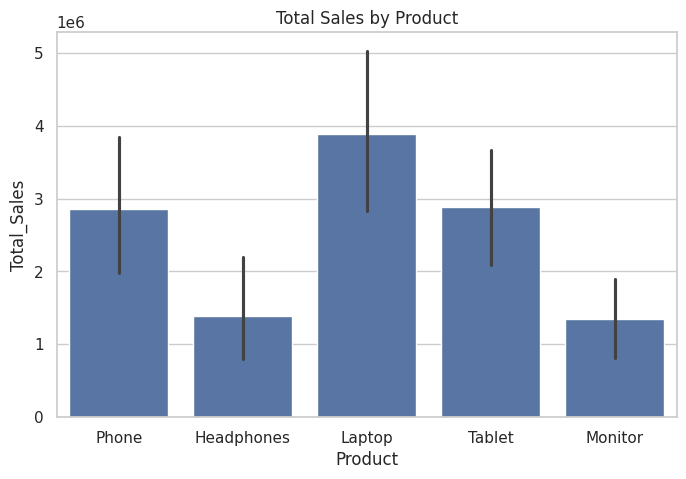

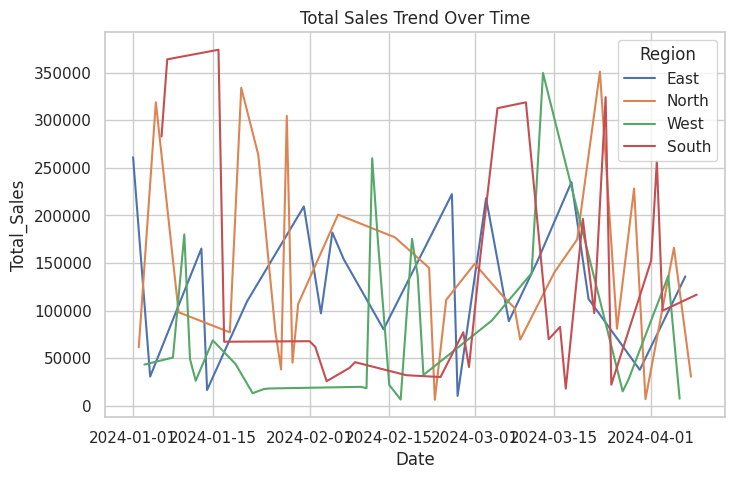

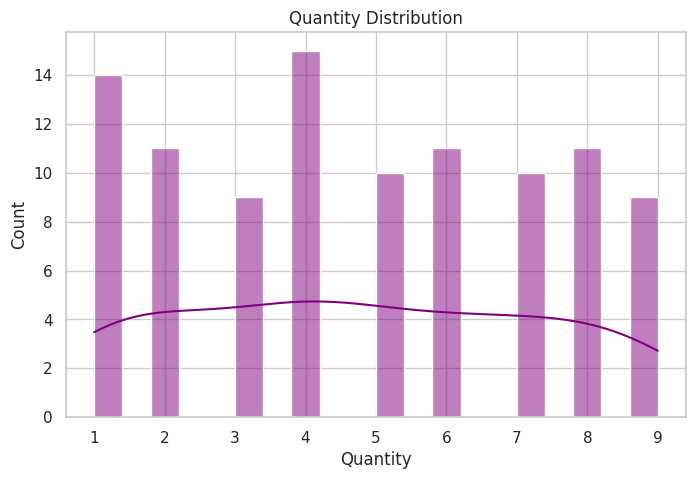

In [6]:
# Sales by Category (Bar Plot)
plt.figure()
sns.barplot(data=df, x="Product", y="Total_Sales", estimator=sum)
plt.title("Total Sales by Product")
plt.show()

# Profit Trend (Line Plot)
plt.figure()
sns.lineplot(data=df, x="Date", y="Total_Sales", hue="Region")
plt.title("Total Sales Trend Over Time")
plt.show()

# Quantity Distribution
plt.figure()
sns.histplot(df["Quantity"], bins=20, kde=True, color="purple")
plt.title("Quantity Distribution")
plt.show()

Day 2: Statistical **Visualizations**

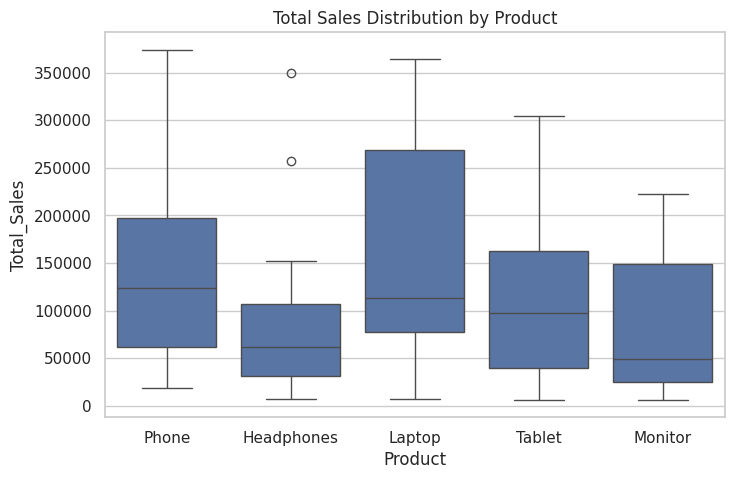

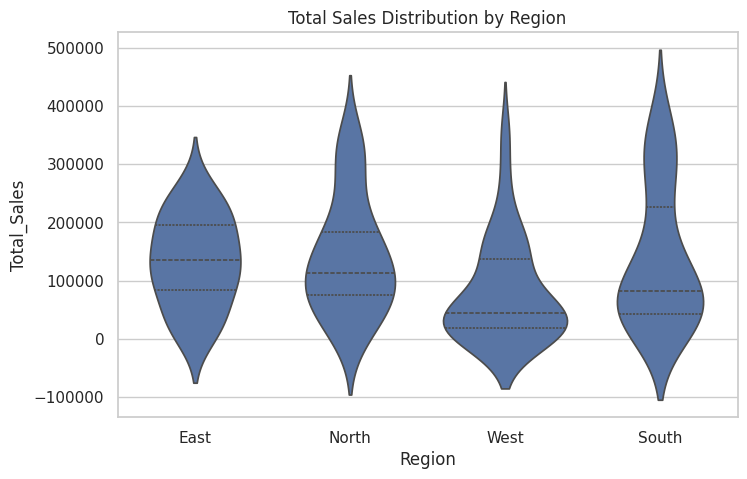

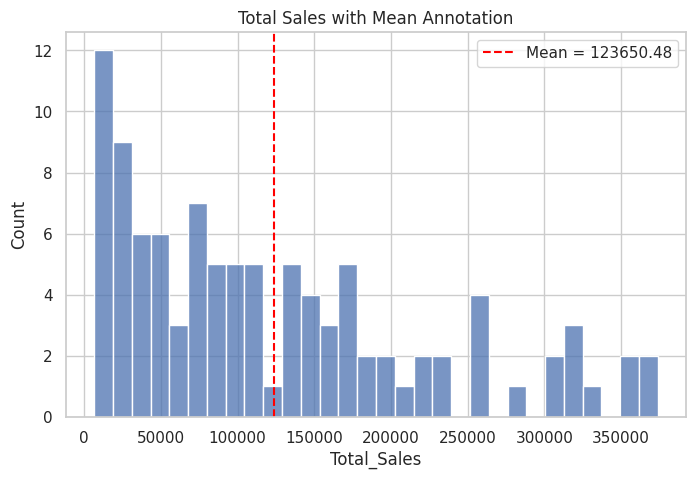

In [8]:
# Box Plot
plt.figure()
sns.boxplot(data=df, x="Product", y="Total_Sales")
plt.title("Total Sales Distribution by Product")
plt.show()

# Violin Plot
plt.figure()
sns.violinplot(data=df, x="Region", y="Total_Sales", inner="quartile")
plt.title("Total Sales Distribution by Region")
plt.show()

# Mean Annotation
mean_sales = df["Total_Sales"].mean()

plt.figure()
sns.histplot(df["Total_Sales"], bins=30)
plt.axvline(mean_sales, color='red', linestyle='--', label=f"Mean = {mean_sales:.2f}")
plt.legend()
plt.title("Total Sales with Mean Annotation")
plt.show()

Day 3: Heatmaps & **Correlation**

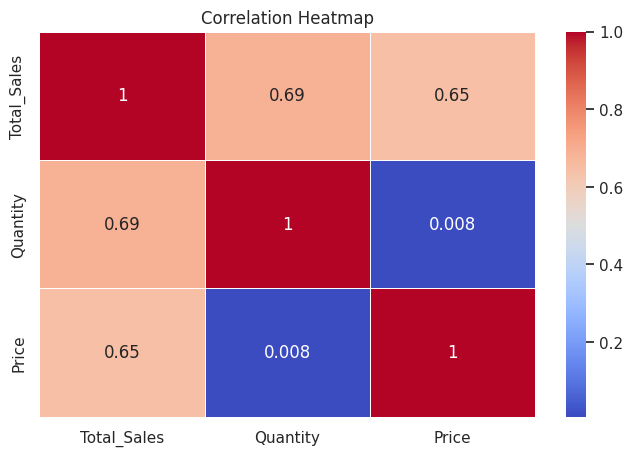

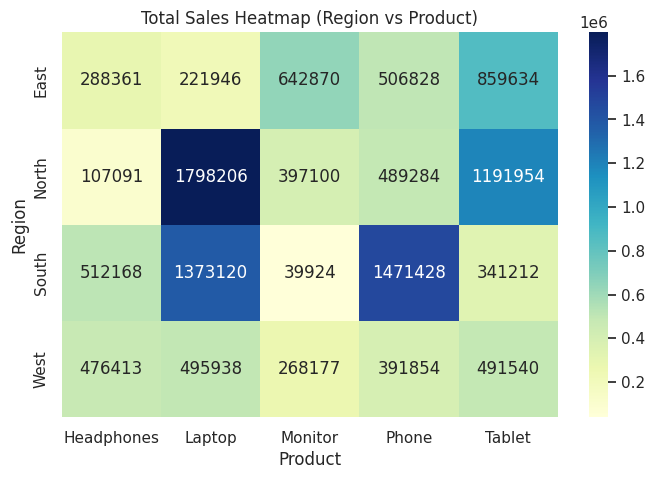

In [10]:
# Correlation Matrix
corr = df[['Total_Sales', 'Quantity', 'Price']].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Custom Heatmap
pivot = df.pivot_table(values="Total_Sales", index="Region", columns="Product", aggfunc="sum")

plt.figure()
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Total Sales Heatmap (Region vs Product)")
plt.show()

Day 4: Multi-plot Dashboard (2×2 Grid)**bold text**

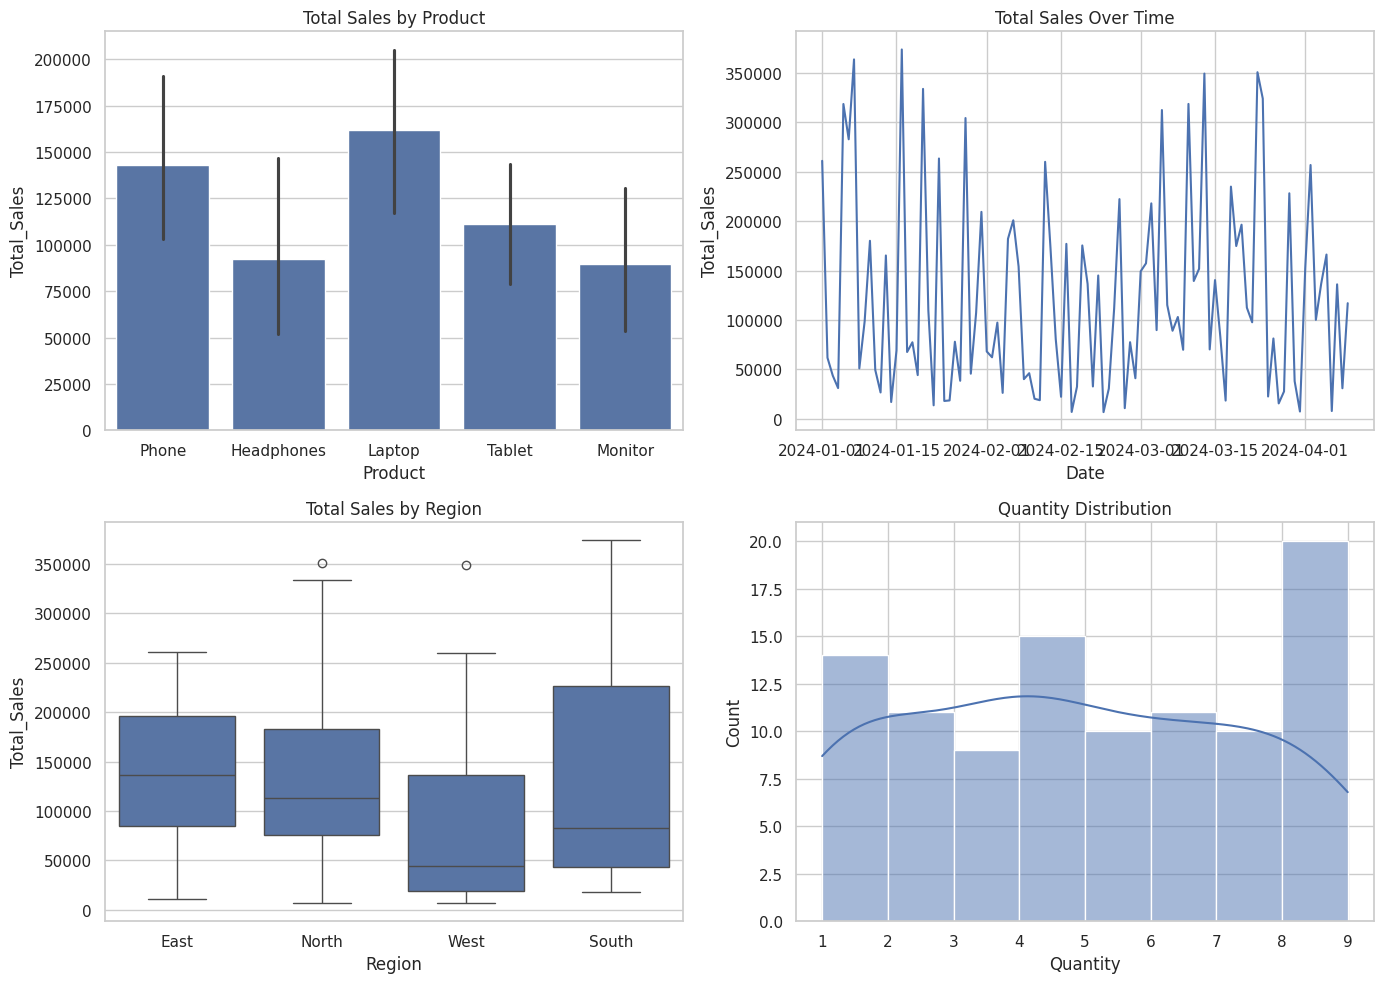

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1
sns.barplot(data=df, x="Product", y="Total_Sales", ax=axes[0,0])
axes[0,0].set_title("Total Sales by Product")

# Plot 2
sns.lineplot(data=df, x="Date", y="Total_Sales", ax=axes[0,1])
axes[0,1].set_title("Total Sales Over Time")

# Plot 3
sns.boxplot(data=df, x="Region", y="Total_Sales", ax=axes[1,0])
axes[1,0].set_title("Total Sales by Region")

# Plot 4
sns.histplot(df["Quantity"], ax=axes[1,1], kde=True)
axes[1,1].set_title("Quantity Distribution")

plt.tight_layout()
plt.show()

Day 5: Interactive Visualizations (Plotly)**bold text**

In [14]:
# Interactive Bar Chart
fig1 = px.bar(
    df,
    x="Product",
    y="Total_Sales",
    color="Region",
    title="Interactive Sales by Product"
)
fig1.show()

# Dropdown Menu
fig2 = px.line(
    df,
    x="Date",
    y="Total_Sales",
    color="Product",
    title="Sales Trend with Dropdown"
)
fig2.show()

# Animated Plot
fig3 = px.scatter(
    df,
    x="Total_Sales",
    y="Quantity", # Using Quantity as there's no 'Profit' column, 'Total_Sales' vs 'Quantity' makes sense
    animation_frame=df['Date'].dt.year,
    size="Quantity",
    color="Product",
    title="Sales vs Quantity Animation"
)
fig3.show()


Day 6: Dashboard Integration (Plotly Subplots)**bold text**

In [16]:
dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Total Sales by Product",
        "Total Sales Over Time",
        "Total Sales vs Quantity",
        "Quantity Distribution"
    ]
)

dashboard.add_trace(
    go.Bar(x=df["Product"], y=df["Total_Sales"]),
    row=1, col=1
)

dashboard.add_trace(
    go.Scatter(x=df["Date"], y=df["Total_Sales"], mode="lines"),
    row=1, col=2
)

dashboard.add_trace(
    go.Scatter(x=df["Total_Sales"], y=df["Quantity"], mode="markers"),
    row=2, col=1
)

dashboard.add_trace(
    go.Histogram(x=df["Quantity"]),
    row=2, col=2
)

dashboard.update_layout(
    height=700,
    title_text="Integrated Sales Dashboard",
    template="plotly_dark"
)

dashboard.show()

Day 7: Polish & **Presentation**

In [18]:
with PdfPages("Final_Seaborn_Report.pdf") as pdf:

    # Page 1
    plt.figure()
    sns.barplot(data=df, x="Product", y="Total_Sales")
    plt.title("Total Sales by Product")
    pdf.savefig()
    plt.close()

    # Page 2
    plt.figure()
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Analysis")
    pdf.savefig()
    plt.close()

    # Page 3
    plt.figure()
    sns.lineplot(data=df, x="Date", y="Total_Sales", hue="Region")
    plt.title("Total Sales Trend")
    pdf.savefig()
    plt.close()

print("✅ Final PDF Report Generated Successfully")

✅ Final PDF Report Generated Successfully
